<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/Plotting_Studenti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







count          39
unique          2
top       Maschio
freq           22
Name: Sesso? , dtype: object


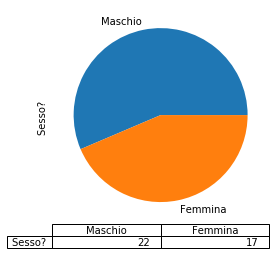

count     39
unique     6
top       16
freq      14
Name: Età?, dtype: object


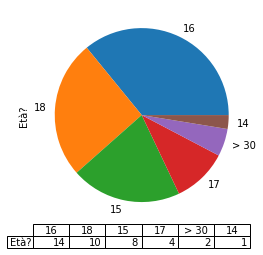

count     39
unique     2
top       Si
freq      36
Name: Sei interessata/o alla Scienza?, dtype: object


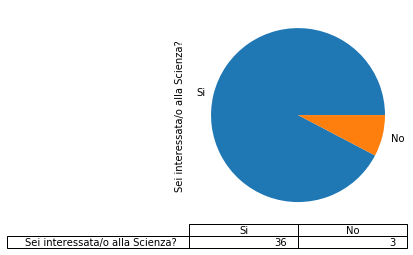

count     39
unique     2
top       No
freq      30
Name: Vuoi fare la scienziata/o in futuro?, dtype: object


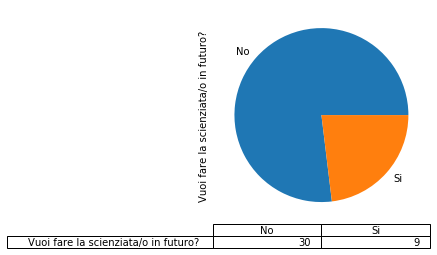

count             39
unique             4
top       ABBASTANZA
freq              21
Name: Quanto hai trovato interessante la lezione?, dtype: object


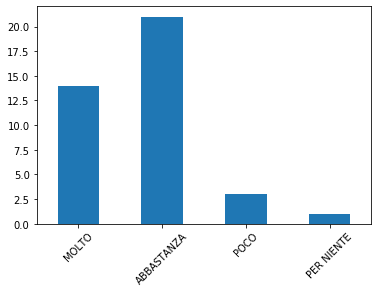

count             39
unique             4
top       ABBASTANZA
freq              19
Name: Quanto la lezione è stata adeguata alla tua preparazione?, dtype: object


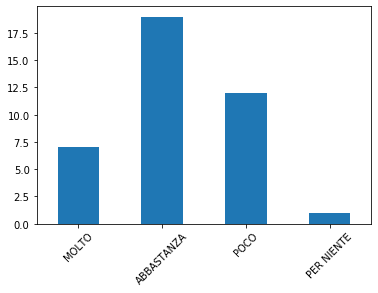

count        39
unique        4
top       MOLTO
freq         21
Name: Quanto è stato chiaro il docente?, dtype: object


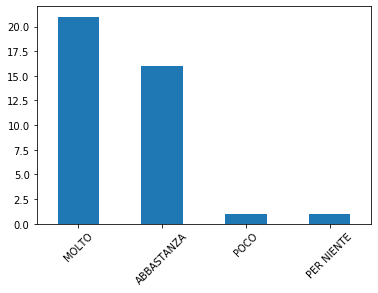

count             39
unique             4
top       ABBASTANZA
freq              21
Name: Quanto ritieni adeguati i materiali ed esercizi presentati?, dtype: object


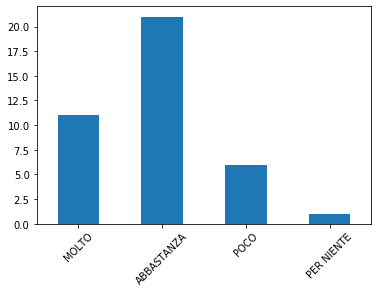

count             39
unique             4
top       ABBASTANZA
freq              18
Name: Quanto ritieni che la lezione servirà per i tuoi studi?, dtype: object


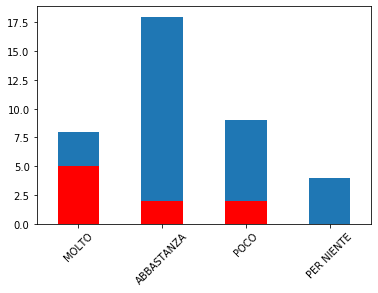

count             39
unique             4
top       ABBASTANZA
freq              13
Name: Quanto ritieni importante il tema trattato per il tuo futuro?, dtype: object


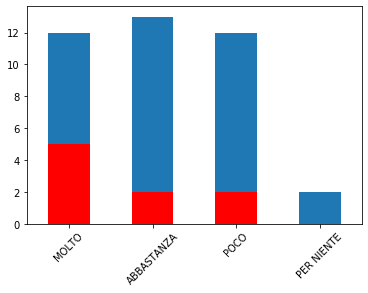

0 continuate così!
1 È un argomento molto interessante e parlatene per pochi minuti non serve, servirebbero ore per esporre al meglio questo argomento per analizzarne i minimi dettagli, per il resto è stato molto interessante


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

info =pd.DataFrame([
    {'scuola':'ITIS E. Fermi - Roma', 'data':'2017-01-20', 'titolo':'CoScienza al Verde', 'alunni':'30'},
    {'scuola':'Paster - Roma', 'data':'2017-02-03', 'titolo':'Computing e Particelle', 'alunni':'50'},
    {'scuola':'Plinio Seniore - Roma', 'data':'2017-02-24', 'titolo':'Focus Grupo Termodinamica', 'alunni':'20'},
    {'scuola':'Giulio Cesare - Roma', 'data':'2017-04-10', 'titolo':'Fisica Moderna', 'alunni':'30'},
    {'scuola':'Giulio Cesare - Roma', 'data':'2017-05-06', 'titolo':'Focus Grupo Termodinamica', 'alunni':'25'},
    {'scuola':'Plinio Seniore - Roma', 'data':'2017-11-01', 'titolo':'Focus Grupo Termodinamica', 'alunni':'25'},
    {'scuola':'Enriques - Ostia', 'data':'2018-01-22', 'titolo':'Fisica Moderna', 'alunni':'40'},
    {'scuola':'Democrito - Casal Palocco 1/2', 'data':'2018-01-29', 'titolo':'Fisica Moderna', 'alunni':'140'},
    {'scuola':'Azzarita - Roma', 'data':'2018-02-21', 'titolo':'Focus Grupo Termodinamica', 'alunni':'70'},
    {'scuola':'Von Neumann - Roma', 'data':'2019-01-15', 'titolo':'Onde Gravitazionali', 'alunni':'30'},
    {'scuola':'IIS Croce-Aleramo - Roma', 'data':'2019-01-22', 'titolo':'Energia e Ssotenibilità', 'alunni':'60'},
    {'scuola':'Liceo Scientifico G. Pellecchia - Cassino', 'data':'2019-02-12', 'titolo':'Onde Gravitazionali', 'alunni':'120'},
    {'scuola':'Faraday - Ostia', 'data':'2019-02-27', 'titolo':'Fisica Moderna', 'alunni':'30'},
    {'scuola':'Azzarita - Roma', 'data':'2019-04-10', 'titolo':'Fisica Moderna', 'alunni':'40'},
    {'scuola':'ITIS Cassino - Settimana della Scienza e della Tecnologia', 'data':'2020-01-14', 'titolo':'Sostenibilità, fisicamente impossibile?', 'alunni':'60'},
    {'scuola':'Liceo Marconi - Colleferro', 'data':'2020-01-25', 'titolo':'L\'Universo Oscuro', 'alunni':'50'}
    ])


ordine = ['MOLTO', 'ABBASTANZA', 'POCO', 'PER NIENTE']
####
# Atrire il file originale con EXCEL e salvarlo come "Tab Delimited txt" ########
####

url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=17AexxGqzBABqBqEVyayu4h5kwb1x7SkxaBG773SXgJM&output=csv"
df = pd.read_csv(url_csv_file)
#df = pd.read_csv("/Users/mazzitel/Dropbox/edu/Dammi un feedback!.txt", sep='\t', header=0, encoding='latin1')

df = df[pd.isnull(df['Vuoi fare la scienziata/o in futuro?']) == False] # purga da fake line insane

###########              
# decommentare per un range specifico e non selezionare per la scuuola.
dataStart = '2020-01-01'
dataEnd   = '2100-01-01'
selectScuola = ''
###########

info=info.set_index("scuola")
#selectScuola = 'Faraday - Ostia'

print ("\n\n")
if selectScuola !='':
    print (info.loc[selectScuola])

print ("\n\n")

if selectScuola !='':
    dataStart = info.loc[selectScuola, 'data' ]
if selectScuola !='':
    date = info['data'].values
    for i in range(0, len(date)):
        if dataStart == date[i]:
            if i+1 == len(date):
                dataEnd   = '2100-01-01'
            else:
                dataEnd = date[i+1]



# print dataStart, dataEnd
df = df[(pd.to_datetime(df['Timestamp']) >= dataStart) & (pd.to_datetime(df['Timestamp']) < dataEnd)]
for i in range(df.columns.get_loc('Sesso? '), len(df.columns)-1):
    if i > df.columns.get_loc('Vuoi fare la scienziata/o in futuro?'):
        pd.value_counts(df[df.columns[i]]).reindex(ordine).plot(
            kind='bar'
        )      
        if i > df.columns.get_loc('Quanto ritieni adeguati i materiali ed esercizi presentati?'):
            pd.value_counts(df[df.columns[i]][df['Vuoi fare la scienziata/o in futuro?'] == 'Si']).reindex(ordine).plot(
                kind='bar', color='red'
            )
        
    else:
        pd.value_counts(df[df.columns[i]]).plot(kind='pie', table=True)
    print (df[df.columns[i]].describe())
    plt.xticks(rotation=45)
    plt.show()
dp = df['Commenti e suggerimenti:'][pd.isnull(df['Commenti e suggerimenti:']) == False]
for i in range (0, len(dp.values)):
    print (i, dp.values[i])

In [0]:
info=info.set_index("titolo")
selectTitolo = 'Focus Grupo Termodinamica'
print ("\n\n")
if selectTitolo !='':
    print (info.loc[selectTitolo])
if selectTitolo !='':
    dataStart = info.loc[selectTitolo, 'data' ]

if selectScuola !='':
    date = info['data'].values
    for i in range(0, len(date)):
        if dataStart == date[i]:
            if i+1 == len(date):
                dataEnd   = '2100-01-01'
            else:
                dataEnd = date[i+1]




                          alunni        data
titolo                                      
Focus Grupo Termodinamica     20  2017-02-24
Focus Grupo Termodinamica     25  2017-05-06
Focus Grupo Termodinamica     25  2017-11-01
Focus Grupo Termodinamica     70  2018-02-21
